# Iris data set - PandS Project 2019
Description: This Jupyter Notebook is the project journal, as described in Readme.md file on Git Hub repository.

Context: Programming and Scripting, GMIT, 2019  
Lecturer: dr Ian McLoughlin

> Author: **Andrzej Kocielski**  
> Github: [andkoc001](https://github.com/andkoc001/)  
> Email: G00376291@gmit.ie  

Date of creation: 03-04-2019  
Last update: 23-04-2019

## Importing external modules and the data set

In [113]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

## Uploading the data set from a .csv file

Reading data set from csv file and assigning a name to it.  
The content of the data set is read from file `iris_dataset.csv` stored in the same location.  
The data set from the csv file is assigned to name **`ids`**, which stans for iris data set.

By default the first row of data is considered a header. Hence, attribite `header=None` which includes also the first row of data is used.

In [114]:
ids = pd.read_csv("iris_dataset.csv", header=None) # ids is short for iris data set

## Basic data set information

Content of the raw data set

In [91]:
# ids # this prints out the content, commented out for clarity (too long)

Size of the data set array - shows number of instances (i.e. rows) and attributes (i.e. columns, aka features) respectively.

In [92]:
ids.shape # shows number of rows and columns

(150, 5)

## Adding data set headers

The data set attributes (i.e. columns) represent respectively:  
1. SL - sepal length, cm,  
2. SW - sepal width, cm,  
3. PL - petal length, cm,  
4. PW - petal width, cm,  
5. Species - species of the iris.

Reference source: https://stackoverflow.com/a/28162530

In [115]:
# Adding headers to attributes (columns)
ids.columns = ["SL", "SW", "PL", "PW", "Species"]

Illustration of the data set, by showing some of the rows (data set instances).

In [94]:
# Showing first n row of the data set
ids.head(3) # if brackets are empty, default n = 5 is assumed

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [95]:
# To show instances (rows) between n and m: ids[n:m]
ids[49:51]

,SL,SW,PL,PW,Species
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [96]:
ids.tail(2) #shows last n (5 by default) rows of data sat

,SL,SW,PL,PW,Species
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Basic statistcal information about each column of the data set, like minimum, mean, maximum, etc.

In [116]:
ids.describe() # shows basic statistical information of the data set

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Separation of data attributes (columns, aka features)

#### Types checks.
Data set type:

In [98]:
type(ids)

pandas.core.frame.DataFrame

Attributes types:

In [99]:
ids.dtypes

SL         float64
SW         float64
PL         float64
PW         float64
Species     object
dtype: object

#### Change of the data structure - from dataframe to array

Separation of data attributes (columns, aka features).

Variable **`ids`** is a DataFrame type of data structure, which cannot be sliced, because of it consists of different types!
One way of dealing with the problem is to change the type to `numpy.ndarray`. Reference source: https://stackoverflow.com/a/37043071.

In [100]:
# converting DataFrame into an array (as per Numpy)
idsv = ids.values
type(idsv) # numpy.ndarray

numpy.ndarray

Unfortunately, as it turns out, `numpy.ndarray` hsa its own limitation. For instance, it has no `.describe()` method. I must consider another data type.

### Slicing the data set into smaller chunks of data

#### 1. Subset of sepal length of Iris Setosa

Analysis of the subset, named as **`SL_setosa`**.

In [101]:
# Slicing - first attributes of first 50 instances - sepal length of Iris Setosa
SL_setosa = idsv[0:50,0]

In [102]:
SL_setosa # This shows content of the subset

array([5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0,
       5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4,
       5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0],
      dtype=object)

Finding out what are the minimum, mean and maximum values of the subset.

In [103]:
SL_setosa_min = np.min(SL_setosa) # minimum value of the subset, see next cell for results
SL_setosa_mean = np.mean(SL_setosa) # mean value of the subset
SL_setosa_max = np.max(SL_setosa) # maximum value of the subset

# Results of sepal length of Iris Setosa
SL_setosa_min, SL_setosa_mean, SL_setosa_max

(4.3, 5.005999999999999, 5.8)

#### 2. Subset of sepal length of Iris Versicolor

Analysis of the subset, named as **`SL_versi`**.

In [104]:
# Slicing - first attributes of first 50 instances - sepal length of Iris Versicolor
SL_versi = idsv[50:100,0]

In [105]:
SL_versi # This shows content of the subset

array([7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7],
      dtype=object)

Finding out what are the minimum, mean and maximum values of the subset.

In [106]:
SL_versi_min = np.min(SL_versi) # minimum value of the subset, see next cell for results
SL_versi_mean = np.mean(SL_versi) # mean value of the subset
SL_versi_max = np.max(SL_versi) # maximum value of the subset

# Results of sepal length of Iris Setosa
SL_versi_min, SL_versi_mean, SL_versi_max

(4.9, 5.936, 7.0)

#### 3. Subset of sepal length of Iris Virginica

Analysis of the subset, named as **`SL_virgi`**.

In [107]:
# Slicing - first attributes of first 50 instances - sepal length of Iris Virginica
SL_virgi = idsv[100:150,0]

In [108]:
SL_virgi # This shows content of the subset

array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
       5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
       6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0,
       6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
      dtype=object)

Finding out what are the minimum, mean and maximum values of the subset.

In [109]:
SL_virgi_min = np.min(SL_virgi) # minimum value of the subset, see next cell for results
SL_virgi_mean = np.mean(SL_virgi) # mean value of the subset
SL_virgi_max = np.max(SL_virgi) # maximum value of the subset

# Results of sepal length of Iris Setosa
SL_virgi_min, SL_virgi_mean, SL_virgi_max

(4.9, 6.587999999999998, 7.9)

### Histograms

Histgram of **`SL_setosa`** (length of sepals of Iris Setosa)

<function matplotlib.pyplot.show(*args, **kw)>

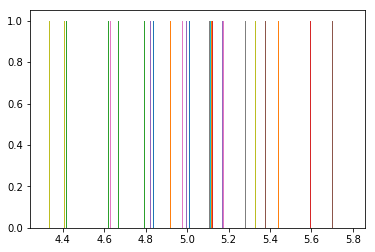

In [110]:
# histogram
pl.hist(SL_setosa)
pl.show

Histgram of **`SL_versi`** (length of sepals of Iris Versicolor)

<function matplotlib.pyplot.show(*args, **kw)>

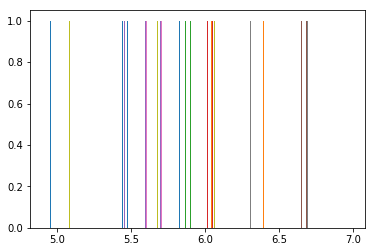

In [111]:
# histogram
pl.hist(SL_versi)
pl.show

Histgram of **`SL_virig`** (length of sepals of Iris Virginica)

<function matplotlib.pyplot.show(*args, **kw)>

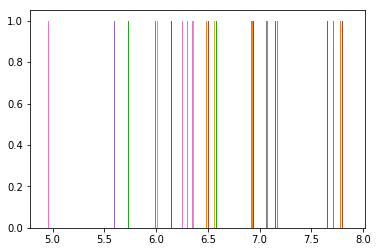

In [112]:
# histogram
pl.hist(SL_virgi)
pl.show

### Separation data set by iris species
Pandas command `groupby` allows for separating the data set by attribute (of the function) passed in the attribute (of the method).  
Reference source: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/.

In [121]:
# Separating the data set by attributes
print(ids.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


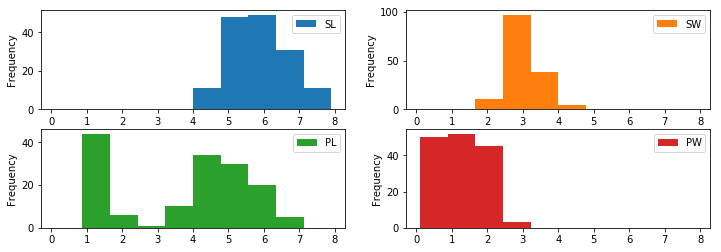

In [173]:
# data plots
# Reference source: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
    
ids.plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,4)) # other kinds are: hist, box, scatter, etc.
pl.show()

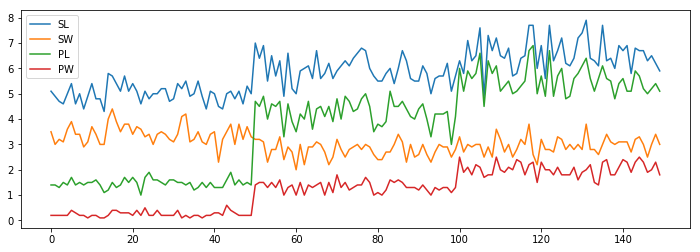

In [172]:
# Reference source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
    
ids.plot(kind='line', figsize=(12,4)) # other kinds are: hist, box, scatter, etc.
pl.show()